In [1]:

try:
    import numpy as np
    import pandas as panda 

    # data visualization
    import seaborn as sns
    %matplotlib inline
    from matplotlib import pyplot as plt
    from matplotlib import style

    # Algorithms
    from sklearn import linear_model
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC, LinearSVC
    from sklearn.naive_bayes import GaussianNB
except:

    #initialize packges
    !pip install numpy
    !pip install pandas
    !pip install sklearn
    !pip install seaborn
    !pip install matplotlib
    import numpy as np
    import pandas as panda 

    # data visualization
    import seaborn as sns
    %matplotlib inline
    from matplotlib import pyplot as plt
    from matplotlib import style

    # Algorithms
    from sklearn import linear_model
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC, LinearSVC
    from sklearn.naive_bayes import GaussianNB



In [2]:
#add usefull functions
def convertfloatfromtitanic(value):    
        try:
            return float(value)
        except (ValueError, TypeError):
            return float(str(value).replace('.','',1))
        return default

In [3]:
database = panda.read_csv("titanicdb.csv")  #read database shoult not have this valus changed
for_test = panda.read_csv("titanicdb.csv")  #obj that we will handle


In [4]:
for_test.info() #show databse information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   sobrevivente              891 non-null    object 
 2   classe_da_passagem        891 non-null    int64  
 3   nome_passageiro           891 non-null    object 
 4   sexo                      891 non-null    object 
 5   idade                     714 non-null    float64
 6   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 7   pais_filhos_a_bordo       891 non-null    int64  
 8   numero_passagem           891 non-null    object 
 9   valor_passagem            891 non-null    object 
 10  id_cabine                 204 non-null    object 
 11  local_de_embarque         889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


In [5]:
total = for_test.isnull().sum().sort_values(ascending=False)
percent_1 = for_test.isnull().sum()/database.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = panda.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12) #get null values percent in database ( missing data)

,Total,%
id_cabine,687,77.1
idade,177,19.9
local_de_embarque,2,0.2
id_passageiro,0,0.0
sobrevivente,0,0.0
classe_da_passagem,0,0.0
nome_passageiro,0,0.0
sexo,0,0.0
irmaos_ou_esposa_a_bordo,0,0.0
pais_filhos_a_bordo,0,0.0


In [6]:
for_test = for_test.drop(columns=['id_cabine', 'nome_passageiro','numero_passagem'])
database = database.drop(columns=['id_cabine','id_passageiro', 'nome_passageiro','numero_passagem'])
#drop passenger id infos (eg. Name, id) 
#drop cabin('id_cabine') column as have more missing data than real info 

In [7]:
data = [for_test, database]

for dataset in data:
    mean = for_test["idade"].mean()
    std = database["idade"].std()
    is_null = dataset["idade"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["idade"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["idade"] = age_slice
    dataset["idade"] = for_test["idade"].astype(int)
    for_test["idade"].isnull().sum()

In [8]:
data = [for_test, database]
survive = {'sim' : 1, 'nao' : 0}

for dataset in data:
    dataset['sobrevivente'] = dataset['sobrevivente'].map(survive) 
#convert object surviving('sobrevivente') to int64 to make things more easy to process


<AxesSubplot:xlabel='classe_da_passagem', ylabel='Count'>

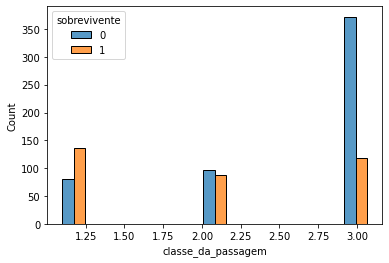

In [9]:

#plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
sns.histplot(data=for_test, x="classe_da_passagem", hue="sobrevivente",multiple="dodge", shrink=.8)


#ax.legend('Female')
#ax.set_title('Female')
#ax = sns.barplot(men[men['sobrevivente']==1].idade.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
#ax = sns.barplot(men[men['sobrevivente']==0].idade.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
#ax.legend('Male')
#_ = ax.set_title('Male')

In [10]:
data = [for_test, database]
gender = {"male" : 0, "female" : 1}

for dataset in data:
    dataset["sexo"] = dataset["sexo"].map(gender) #convert object gender to int64 to make things more easy
    

In [11]:
data = [for_test, database]

for dataset in data:
    dataset['Relatives']= (dataset['pais_filhos_a_bordo'] + dataset['irmaos_ou_esposa_a_bordo']) 
#join relationships columns('pais_filhos_a_bordo' and 'irmaos_ou_esposa_a_bordo') into an single column Relatives 


In [12]:
for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_passageiro             891 non-null    int64 
 1   sobrevivente              891 non-null    int64 
 2   classe_da_passagem        891 non-null    int64 
 3   sexo                      891 non-null    int64 
 4   idade                     891 non-null    int64 
 5   irmaos_ou_esposa_a_bordo  891 non-null    int64 
 6   pais_filhos_a_bordo       891 non-null    int64 
 7   valor_passagem            891 non-null    object
 8   local_de_embarque         889 non-null    object
 9   Relatives                 891 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 69.7+ KB


In [13]:
for_test["local_de_embarque"].unique()
#get unique values from boarding 

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
data = [for_test, database]
boarding = {'S' : 0, 'C' : 1,'Q' : 2}

for dataset in data:
    dataset['local_de_embarque'] = dataset['local_de_embarque'].fillna('S')
    dataset['local_de_embarque'] = dataset['local_de_embarque'].map(boarding) 
#convert object boarding('local_de_embarque') to int64 to make things more easy to process


In [15]:
data = [for_test, database]

for dataset in data: 
    dataset['valor_passagem'] = dataset['valor_passagem'].transform(func = lambda x : convertfloatfromtitanic(x)).astype(float)
 #convert object fare('valor_passagem') to float64 to make things more easy to process

In [16]:
for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   sobrevivente              891 non-null    int64  
 2   classe_da_passagem        891 non-null    int64  
 3   sexo                      891 non-null    int64  
 4   idade                     891 non-null    int64  
 5   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 6   pais_filhos_a_bordo       891 non-null    int64  
 7   valor_passagem            891 non-null    float64
 8   local_de_embarque         891 non-null    int64  
 9   Relatives                 891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [17]:
#database = database.drop("irmaos_ou_esposa_a_bordo", axis=1)
database = database.drop("pais_filhos_a_bordo", axis=1)
#for_test = for_test.drop("irmaos_ou_esposa_a_bordo", axis=1)
for_test = for_test.drop("pais_filhos_a_bordo", axis=1)

In [18]:
X_train = database.drop("sobrevivente", axis=1)
Y_train = database["sobrevivente"]
X_test  = for_test.drop(columns=['id_passageiro','sobrevivente']).copy()

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classe_da_passagem        891 non-null    int64  
 1   sexo                      891 non-null    int64  
 2   idade                     891 non-null    int64  
 3   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 4   valor_passagem            891 non-null    float64
 5   local_de_embarque         891 non-null    int64  
 6   Relatives                 891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classe_da_passagem        891 non-null    int64  
 1   sexo                      891 non-null    int64  
 2   idade                     891 non-null    int64  
 3   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 4   valor_passagem            891 non-null    float64
 5   local_de_embarque         891 non-null    int64  
 6   Relatives                 891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [21]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


In [22]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [23]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [24]:
perceptron = Perceptron(max_iter=7)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [25]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [26]:
results = panda.DataFrame({
    'Model': ['Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.65,Random Forest
98.65,Decision Tree
79.69,Naive Bayes
61.62,Stochastic Gradient Decent
59.37,Perceptron


In [27]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.83146067 0.76404494 0.79775281 0.82022472 0.79775281
 0.85393258 0.79775281 0.86516854 0.82022472]
Mean: 0.8103870162297128
Standard Deviation: 0.0334183152707685


In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
score1 = cross_val_score(dt,X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", score1)
print("Mean:", score1.mean())
print("Standard Deviation:", score1.std())

Scores: [0.68888889 0.75280899 0.71910112 0.80898876 0.7752809  0.82022472
 0.80898876 0.73033708 0.78651685 0.80898876]
Mean: 0.7700124843945069
Standard Deviation: 0.04292082540484524


In [29]:
importances = panda.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
idade,0.270
sexo,0.267
valor_passagem,0.240
classe_da_passagem,0.092
Relatives,0.069
irmaos_ou_esposa_a_bordo,0.033
local_de_embarque,0.029


In [30]:
importances = panda.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
sexo,0.305
valor_passagem,0.235
idade,0.211
classe_da_passagem,0.109
Relatives,0.060
irmaos_ou_esposa_a_bordo,0.055
local_de_embarque,0.025
